# Сборный проект 2

**Анализ поведения пользователей мобильного приложения.**

## Сбор первичной информации о проекте

### Описание проекта:

Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения. Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.

Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

В случае общей аналитики и A/A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

### Описание данных:

Каждая запись в логе — это действие пользователя, или событие.
1. `EventName` — название события;
2. `DeviceIDHash` — уникальный идентификатор пользователя;
3. `EventTimestamp` — время события;
4. `ExpId` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

### Задачи проекта:

1. **Откройте файл** с данными и изучите общую информацию.
`/datasets/logs_exp.csv`

2. **Подготовьте данные:**
    1. Замените названия столбцов на удобные для вас;
    2. Проверьте пропуски и типы данных. Откорректируйте, если нужно;
    3. Добавьте столбец даты и времени, а также отдельный столбец дат;

3. **Изучите и проверьте данные:**
    1. Сколько всего событий в логе?
    2. Сколько всего пользователей в логе?
    3. Сколько в среднем событий приходится на пользователя?
    4. Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?
    5. Много ли событий и пользователей вы потеряли, отбросив старые данные?
    6. Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

4. **Изучите воронку событий:**
    1. Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.
    2. Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.
    3. Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
    4. По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
    5. На каком шаге теряете больше всего пользователей?
    6. Какая доля пользователей доходит от первого события до оплаты?

5. **Изучите результаты эксперимента:**
    1. Сколько пользователей в каждой экспериментальной группе?
    2. Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.
    3. Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
    4. Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
    5. Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

## Основной проект:

### Подготовка данных

In [1]:
# Add modules to the project
from io import BytesIO
import requests

import re
import math as mth
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import scipy.stats as stats
from scipy import stats as st
from datetime import datetime
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Get common information about datasets
def get_info(df, df_name):
    '''
    df : Dataframe,
        The dataset with data for the project
    df_name : Objects
        The name of the dataset for information     
    Return:
        There are no return fields
    '''
    print(f'Common information about - {df_name}')
    display(df.head())
    df.info()
    print(' ')
    print(df.columns)   
    print(' ')
    print(f'Numbers of NaN values in the dataset - {df_name}')
    print(df.isnull().sum())
    print(' ')
    print(f'Numbers of duplicates (explicit)in the dataset - {df_name}')
    print(df.duplicated().sum())
     

# Get data
try:
    print('Using local machine')
    main_path = 'C:/Users/Churiulin/Desktop/Yandex/Projects/DATASETS'
    df_data   = pd.read_csv(f'{main_path}/logs_exp.csv', sep = '\t')
except FileNotFoundError:
    print('Using Yandex machine')
    df_data   = pd.read_csv('/datasets/logs_exp.csv', sep = '\t' )

Using local machine
Using Yandex machine


In [3]:
print(get_info(df_data, 'logs_exp')) 

Common information about - logs_exp


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
 
Index(['EventName', 'DeviceIDHash', 'EventTimestamp', 'ExpId'], dtype='object')
 
Numbers of NaN values in the dataset - logs_exp
EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64
 
Numbers of duplicates (explicit)in the dataset - logs_exp
413
None


Исходя из полученных данных, можно сразу отметить нескольку пунктов, которые нужно сделать в первую очередь:
1. Переименовать колонки;
2. Привести текстовые значения в колонке **EventName** - к одному регистру;
3. Проверить еще раз на наличие дубликатов после изменения регистра

In [4]:
# change columns names
df_data.columns = ['event_name', 'user_id', 'event_time', 'exp_id']

# Create a nan timeseries
event = pd.Series(np.nan, index = df_data.index) # new event_name with space
fdate = pd.Series(np.nan, index = df_data.index) # new column with data (date + time)
sdate = pd.Series(np.nan, index = df_data.index) # new column with data (date)

In [5]:
# Correct NaN timeseries
for i in range(len(df_data)):
    # add space between cover letter
    event[i] = re.sub('(\w)([A-Z])', r'\1 \2', df_data['event_name'][i])
    # add column with data (date + time)
    fdate[i] = datetime.utcfromtimestamp(df_data['event_time'][i]).strftime('%Y-%m-%d %H:%M:%S')
    # add column only with date
    sdate[i] = datetime.utcfromtimestamp(df_data['event_time'][i]).strftime('%Y-%m-%d')

In [6]:
# Create a final dataset with new columns
df_final = (pd.concat([event, df_data,  fdate, sdate], axis = 1)).drop(['event_name', 
                                                                        'event_time'], axis = 1) 
# rename columns
df_final.columns = ['event_name', 'user_id'  ,
                    'group'     , 'full_date', 
                    'short_data'             ]

# Change format to the new columns with date 
df_final['full_date']  = pd.to_datetime(df_final['full_date'])
df_final['short_data'] = pd.to_datetime(df_final['short_data'])

# Change register of event names
df_final['event_name'] = df_final['event_name'].str.lower()

# Drop duplicates
df_final = df_final.drop_duplicates().dropna().reset_index(drop = True)

print(get_info(df_final, 'final dataset')) 

Common information about - final dataset


,event_name,user_id,group,full_date,short_data
0,main screen appear,4575588528974610257,246,2019-07-25 04:43:36,2019-07-25
1,main screen appear,7416695313311560658,246,2019-07-25 11:11:42,2019-07-25
2,payment screen successful,3518123091307005509,248,2019-07-25 11:28:47,2019-07-25
3,cart screen appear,3518123091307005509,248,2019-07-25 11:28:47,2019-07-25
4,payment screen successful,6217807653094995999,248,2019-07-25 11:48:42,2019-07-25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 5 columns):
event_name    243713 non-null object
user_id       243713 non-null int64
group         243713 non-null int64
full_date     243713 non-null datetime64[ns]
short_data    243713 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 9.3+ MB
 
Index(['event_name', 'user_id', 'group', 'full_date', 'short_data'], dtype='object')
 
Numbers of NaN values in the dataset - final dataset
event_name    0
user_id       0
group         0
full_date     0
short_data    0
dtype: int64
 
Numbers of duplicates (explicit)in the dataset - final dataset
0
None


Дополнительно проверю наличие одинаковых пользователей в 3 группах

In [7]:
# check users_id
def check_users(groupA, groupB): 
    count = 0
    for id_A in groupA:
        for id_B in groupB:
            if id_A == id_B:
                count += 1
                print(f'User with ID {id_B} is in both groups')
    if count == 0:
        print('There are no user in the research groups')
    
# Get data
group_246 = df_final.query('group == "246"')
group_247 = df_final.query('group == "247"')
group_248 = df_final.query('group == "248"')

# get unique users_id
unic_users246 = group_246['user_id'].unique()
unic_users247 = group_247['user_id'].unique()
unic_users248 = group_248['user_id'].unique()


Выполню проверку по группе 246

In [8]:
# Check group_246 and group_247
check_users(unic_users246, unic_users247)
print('')
# Check group_246 and group_248
check_users(unic_users246, unic_users248)

There are no user in the research groups

There are no user in the research groups


**Вывод:** Пользователи из группа 246 - не встречаются в группах 247 и 248.

Выполню проверку по группе 247

In [9]:
# Check group_247 and group_246
check_users(unic_users247, unic_users246)
print('')
# Check group_247 and group_248
check_users(unic_users247, unic_users248)

There are no user in the research groups

There are no user in the research groups


**Вывод:** Пользователи из группа 246 - не встречаются в группах 247 и 248.

**Вывод по разделу:** В результате предобработки данных были исправлены названия столбцов (приведены к одному виду), удалены дубликаты, изменен формат данных для столбца с информацие о дате и времени (созданы два новых столбца) и внесены корректировки в колонку с текстовой информацией, в частности был добавлен пробел между словами и скорректирован регистр. Теперь набор данных готов к последующей обработке.

### Изучение и проверка данных:

Для того чтобы ответить на вопрос **сколько всего событий в логе**, сначала нужно определится что же такое событие. Я предпологаю, что событие есть каждая уникальная строчка в столбце **event_name**. По этому нужно найти уникальные значения и посчитать их количество:

In [10]:
print('Всего событий в логе:', (df_final['event_name'].nunique()), '\n')

print('Уникальные события в логе:', (df_final['event_name'].unique()), '\n')

Всего событий в логе: 5 

Уникальные события в логе: ['main screen appear' 'payment screen successful' 'cart screen appear'
 'offers screen appear' 'tutorial'] 



Для того чтобы найти **количество уникальных пользователей** воспользуюсь методом `nunique`:

In [11]:
print('Всего уникальных пользователей:', df_final['user_id'].nunique())

Всего уникальных пользователей: 7551


Для ответа сколько **в среднем событий** приходится **на одного пользователя** воспользуюсь группировкой и методом `groupby`:

In [12]:
mean_user = (df_final
                 .groupby('user_id')
                 .agg({'full_date':'count'})
                 .rename(columns = {'full_date' : 'mean_event'})
                 .sort_values('mean_event', ascending = False)
            ).reset_index()
# Users ID for excluding
top19_list = mean_user.head(19)
print(top19_list)

                user_id  mean_event
0   6304868067479728361        2307
1    197027893265565660        1998
2   4623191541214045580        1768
3   6932517045703054087        1439
4   1754140665440434215        1221
5   3337471580007169353        1186
6   7738058666231999878         888
7   1055544042902443290         854
8   4713748699910253089         824
9   8118046800480174342         755
10  1989685320445148348         729
11  3521696259961091617         702
12  3610536745613892312         661
13  1100007125648169445         661
14  2305766456715991733         658
15  5996739817823449506         585
16  3940194724501792579         569
17  8173190940950873857         555
18  2768580714092136945         529


Теперь когда я знаю сколько действий приходится на пользователей построю гистограмму рассеивания

In [13]:
# Settings for plots
def plot_settungs(ax, title, xlabel, ylabel, deg):
                      
    ''' 
    ax             - Figure
        Area for visualization
    title          - Objects
        The plot title
    xlabel, ylabel - Objects
        labels of x and y axis
    deg            - Int
    '''  
    ax.set_title(title  , color = 'black', fontsize = 14, pad = 20)
    ax.set_xlabel(xlabel, color = 'black', fontsize = 14, labelpad = 20)
    ax.set_ylabel(ylabel, color = 'black', fontsize = 14, labelpad = 20)

    ax.grid(True, which     = 'major', 
                  color     = 'k'    ,
                  linestyle = 'solid',
                  alpha     = 0.5    )

    for label in ax.xaxis.get_ticklabels():
        label.set_color('black')
        label.set_rotation(deg)
        label.set_fontsize(14)
    for label in ax.yaxis.get_ticklabels():
        label.set_color('black')
        label.set_fontsize(14)  
    plt.show();

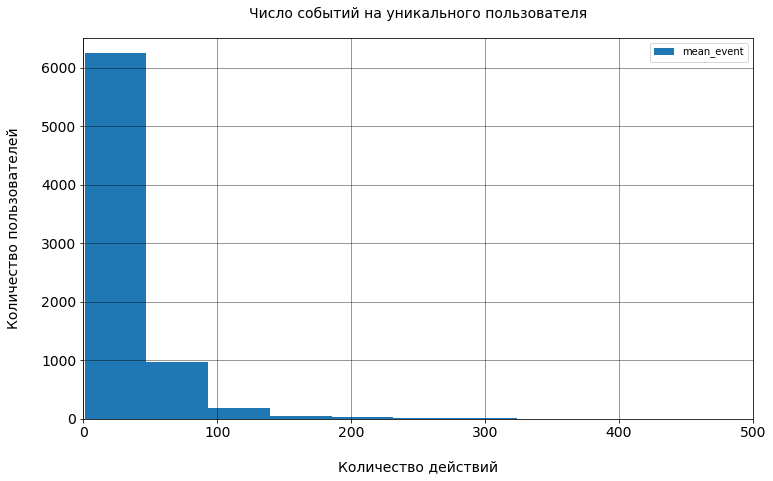

In [14]:
# Function for histogramm
def histogram(df, col, bin, ax, **kwargs):
    return df.plot(y    = col   , title = col,
                   kind = 'hist', bins  = bin,
                   ax   = ax    , **kwargs   )

# Create plot area
fig = plt.figure(figsize = (12, 7))
ax  = fig.add_subplot(111) 

# Create plot
plots =  histogram(mean_user   , 'mean_event',                   
                   bin  = 50   , ax   = ax   ,
                   xlim = (0.0,  500.1)      ,
                   ylim = (0.0, 6500.1)      )
# Create settings
plots =  plot_settungs(ax, 'Число событий на уникального пользователя',
                           'Количество действий'                      ,
                           'Количество пользователей',   deg = 0      )

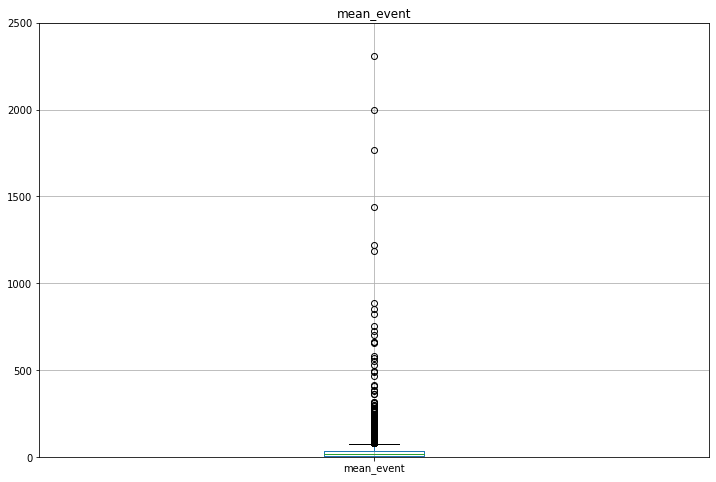

In [15]:
# Create boxplot
def boxplots(df, col, ax, **kwargs):
    return df.plot(y    = col  , title = col, 
                   kind = 'box', ax    = ax ,
                   grid = True , **kwargs   ) 

fig = plt.figure(figsize = (12, 7))
ax  = fig.add_subplot(111) 

# Create plot
plots =  boxplots(mean_user, 'mean_event'        ,                   
                  ax = ax  , ylim = (0.0, 2500.1),
                  figsize = (12, 8)              )

In [16]:
print('Среднее количество событий на пользователя с учетом выбросов:' , 
      mean_user['mean_event'].mean()  , '\n')

print('Среднее количество событий на пользователя без учета выбросов:', 
      mean_user['mean_event'].median(), '\n')

Среднее количество событий на пользователя с учетом выбросов: 32.27559263673685 

Среднее количество событий на пользователя без учета выбросов: 20.0 



Определим **минимальную и максимальную дату** совершения события пользователями и построю **гистограмму распределения** событий по времени.

Самая раняя   дата совершения события: 2019-07-25 04:43:36
Самая поздняя дата совершения события: 2019-08-07 21:15:17


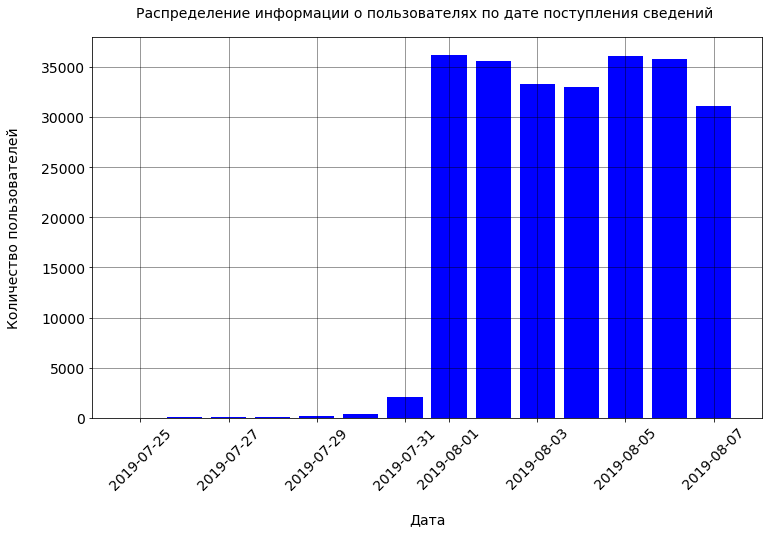

In [17]:
# Get min and max data for analysis.
min_date = df_final['full_date'].min()
max_date = df_final['full_date'].max()  

print('Самая раняя   дата совершения события:', min_date)
print('Самая поздняя дата совершения события:', max_date)

# Get data collected by date
report = df_final.groupby('short_data').agg({'user_id': 'count'})

# Plot histogramm
fig = plt.figure(figsize = (12, 7))
ax  = fig.add_subplot(111) 

# visualization
ax.bar(report.index, report['user_id'], color = 'blue')
# plot settings
plots =  plot_settungs(ax, 'Распределение информации о пользователях по дате поступления сведений ',
                           'Дата'                    ,
                           'Количество пользователей',   deg = 45)

In [18]:
df_final

,event_name,user_id,group,full_date,short_data
0,main screen appear,4575588528974610257,246,2019-07-25 04:43:36,2019-07-25
1,main screen appear,7416695313311560658,246,2019-07-25 11:11:42,2019-07-25
2,payment screen successful,3518123091307005509,248,2019-07-25 11:28:47,2019-07-25
3,cart screen appear,3518123091307005509,248,2019-07-25 11:28:47,2019-07-25
4,payment screen successful,6217807653094995999,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...
243708,main screen appear,4599628364049201812,247,2019-08-07 21:12:25,2019-08-07
243709,main screen appear,5849806612437486590,246,2019-08-07 21:13:59,2019-08-07
243710,main screen appear,5746969938801999050,246,2019-08-07 21:14:43,2019-08-07
243711,main screen appear,5746969938801999050,246,2019-08-07 21:14:58,2019-08-07


In [19]:
old_data = df_final.query('short_data < "2019-07-31"')

# Calculate string and user numbers
del_strings = len(old_data['short_data']) / len(df_final['short_data'])
del_users   = old_data['user_id'].nunique() / df_final['user_id'].nunique()

print('Количество данных, которые нужно отбросить:', len(old_data['short_data']))
print(f'Процент удаленных строк: {del_strings:.2%}')
print(f'Процент удаленных пользователей: {del_users:.2%}') 

Количество данных, которые нужно отбросить: 796
Процент удаленных строк: 0.33%
Процент удаленных пользователей: 7.35%


Вывод: В результате проверки удалось установить, что в наш набор данных для исследований попало 796 (0.3%) позиций относящихся к предыдушему периоду. Кроме того, в этих строчка содержится 7.4% пользователей. Скорее всего такой значительный процент связан с тем, что это постоянные покупатели, кто использует наше приложение уже какое-то время. Поэтому не удивительно, что информация об их заказах есть в данных за предыдуший период.

**Вывод по разделу**: 

Изучив набор данных, я определил что в изначальном наборе данных с учетом удаленных дубликатов есть всего **5 уникальных событий**: *main screen appear*, *payment screen successful*, *cart screen appear*, *offers screen appear*, *tutorial*. Эти события относятся к **7551 уникальных пользователя** интернет магазина. Каждый уникальный пользователь совершает **в среднем от 20 до 33 действий на сайте**. При этом есть особенные клиенты, которые совершают от 100 - 500 действие, также есть группа лиц, которые совершили более 500 действий. Но это либо постоянные клиенты, которые совершают множество заказов или тестировщики, либо это просто ошибки (выбросы) и для более достоверных результатов таких пользователей я исключу из финальной выборки.



Кроме того, я определи, что в изначальном наборе данных есть данные за период с 25.07.2019 по 07.08.2019. При этом выполнив более детальный анализ данных, мне удалось выявить четку границу, после которой количество данных резко увеличивается - 01.08.2019. Поэтому, я считаю что дата 01.08.2019 является датой, с которой начинается актуальные сведения о пользователях. События, которые случились раннее нужно отбросить из нашего анализа. Соответственно актуальные период составляет всего 1 неделю с 01.08.2019 по 07.08.2019.

Я также установил, что количество устаревших данных который нужно отбросить равняется 2826 позиций.

In [20]:
# Define correct data for actual period
data4analysis = df_final.query('short_data >= "2019-08-01"')

# Define users with extreme numbers
for user in top19_list['user_id']:
    data4analysis = data4analysis.query('user_id != @user')

# Check values again
get_info(data4analysis, 'data')

Common information about - data


,event_name,user_id,group,full_date,short_data
2826,tutorial,3737462046622621720,246,2019-08-01 00:07:28,2019-08-01
2827,main screen appear,3737462046622621720,246,2019-08-01 00:08:00,2019-08-01
2828,main screen appear,3737462046622621720,246,2019-08-01 00:08:55,2019-08-01
2829,offers screen appear,3737462046622621720,246,2019-08-01 00:08:58,2019-08-01
2830,main screen appear,1433840883824088890,247,2019-08-01 00:08:59,2019-08-01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 222011 entries, 2826 to 243712
Data columns (total 5 columns):
event_name    222011 non-null object
user_id       222011 non-null int64
group         222011 non-null int64
full_date     222011 non-null datetime64[ns]
short_data    222011 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 10.2+ MB
 
Index(['event_name', 'user_id', 'group', 'full_date', 'short_data'], dtype='object')
 
Numbers of NaN values in the dataset - data
event_name    0
user_id       0
group         0
full_date     0
short_data    0
dtype: int64
 
Numbers of duplicates (explicit)in the dataset - data
0


In [21]:
print('Количество пользователей в каждой группе: \n')
print(data4analysis.groupby('group').agg({'user_id':'nunique'}).rename(columns = {'user_id': 'users'}))

Количество пользователей в каждой группе: 

       users
group       
246     2478
247     2509
248     2528


**Вывод:** Набор данных полностью проверен, откинуты данные за предыдущий период, кроме того, выполнена отбраковка пользователей, которые совершают от 500 и более действий. Финальные набор данных находится в переменной **data4analysis**.

### Изучение воронки событий:

#### Посмотрите, какие события есть в логах, как часто они встречаются. 

In [22]:
event_count = (data4analysis
                     .groupby('event_name')
                     .agg({'user_id' : 'count'})
                     .reset_index()
                     .rename(columns = {'user_id' : 'event_numbers'})
                     .sort_values('event_numbers', ascending = False)
                 ).reset_index(drop = True)
event_count

,event_name,event_numbers
0,main screen appear,116209
1,offers screen appear,44438
2,cart screen appear,34122
3,payment screen successful,26240
4,tutorial,1002


**Вывод:** Большего всего пользователи встречаются с появлением главного экрана, после чего большая часть из них закрывает приложение. Примерно 1/3 от общего числа пользователей переходит на следующий шаг. До оплаты доходит примерно половина пользователей от числа всех пользователей получивших предложение. Реже всего пользователи обращаются к справочной информации, что косвенно свидетельствует о том, что интерфейс приложения интуитивно понятен.

In [23]:
users_count = (data4analysis
                       .groupby('event_name')
                       .agg({'user_id': 'nunique'})
                       .sort_values(by = 'user_id', ascending = False)
                       .rename(columns = {'user_id' : 'user_numbers'})
              ).reset_index()
users_count['CR'] = (users_count['user_numbers'] / data4analysis['user_id'].nunique())* 100

# Create a zero timeseries for converstion in step
cp_step = pd.Series(np.nan, index = users_count.index) # new event_name with space

for i in range(len(users_count)):
    if i == 0:
        cp_step[i] = (users_count['user_numbers'][i] / users_count['user_numbers'][i]) * 100
    else:
        cp_step[i] = (users_count['user_numbers'][i] / users_count['user_numbers'][i - 1]) * 100
        
users_count['CR_step'] = cp_step
users_count

,event_name,user_numbers,CR,CR_step
0,main screen appear,7400,98.469727,100.000000
1,offers screen appear,4574,60.864937,61.810811
2,cart screen appear,3715,49.434464,81.219939
3,payment screen successful,3520,46.839654,94.751009
4,tutorial,837,11.137725,23.778409


Вывод: Рассчитав конверсию на каждом шаге можно отметить, что ни на одном шаге нет 100%. Поэтому предположу, что эти 2% пользователей закрывают наше приложение даже не просмотрев главную страницу.

In [24]:
report = event_count.merge(users_count, on = ['event_name'], how = 'left')

pd.set_option('display.precision', 1)

print('Full report')
display(report)

Full report


,event_name,event_numbers,user_numbers,CR,CR_step
0,main screen appear,116209,7400,98.5,100.0
1,offers screen appear,44438,4574,60.9,61.8
2,cart screen appear,34122,3715,49.4,81.2
3,payment screen successful,26240,3520,46.8,94.8
4,tutorial,1002,837,11.1,23.8


Вывод: В полном отчете представлен набор данных, который получился с использованием всех событий. Отмечу, что справочный материал - tutorial, не является основной целью для продаж нашего приложения, поэтому исключу данные пункт из воронки.

Marketing funnel


,event_name,event_numbers,user_numbers,CR,CR_step
0,main screen appear,116209,7400,98.5,100.0
1,offers screen appear,44438,4574,60.9,61.8
2,cart screen appear,34122,3715,49.4,81.2
3,payment screen successful,26240,3520,46.8,94.8


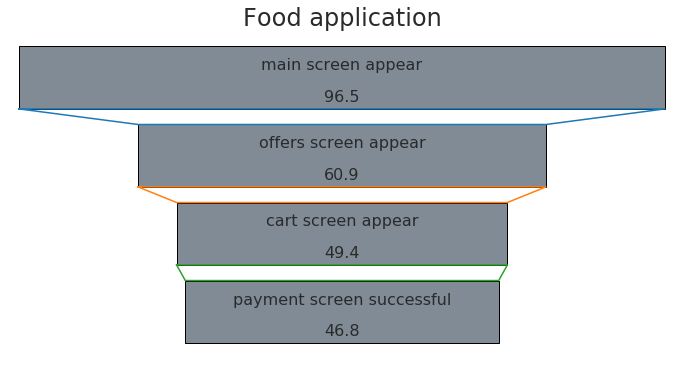

In [25]:
voronka = report[0:4]
print('Marketing funnel')
display(voronka)

y      = [ 4  ,  3  ,  2  ,  1  ]
x      = [96.5, 60.9, 49.4, 46.8]
labels = voronka['event_name']

x_max = 100
x_min = 0
x_range = x_max - x_min

fig, ax = plt.subplots(1, figsize=(12,6))
for idx, val in enumerate(x):
    left = (x_range - val)/2
    plt.barh(y[idx], x[idx], left      = left     , 
                             color     = '#808B96',
                             height    = 0.8      , 
                             edgecolor = 'black'  )
    # label
    plt.text(50, y[idx]+0.1, labels[idx], ha       = 'center' ,
                                          fontsize = 16       ,
                                          color    = '#2A2A2A')
    # value
    plt.text(50, y[idx]-0.3, x[idx], ha       = 'center' , 
                                     fontsize = 16       ,
                                     color    = '#2A2A2A')
    
    if idx != len(x)-1:
        next_left = (x_range - x[idx + 1]) / 2
        shadow_x  = [left, next_left, 
                     100 - next_left, 100 - left, left]
        
        shadow_y  = [y[idx] - 0.4    , y[idx + 1] + 0.4, 
                     y[idx + 1] + 0.4, y[idx] - 0.4, y[idx] - 0.4]
        plt.plot(shadow_x, shadow_y)
plt.xlim(x_min, x_max)
plt.axis('off')
plt.title('Food application', loc      = 'center' ,
                              fontsize = 24       ,
                              color    = '#2A2A2A')
plt.show()

**Вывод по разделу:** Построив продуктовую воронку можно отметить, что больше всего пользователей попадают на главную страницу сайта. На следующий шаг, а именно просмотр страницы с предложениями переходит только 61%. Из оставшихся пользователей к странице оплаты переходит 81% оставшихся пользователей, при этом  большинство из них (94%) совершают успешную покупку. Кроме того, наше приложение интуитивно понятно для большинства пользователей. При  этом данное событие не относится к воронке событий.  Также, отмечу что больше всего пользователей (почти 40%) мы теряем на моменте перехода с главной страницы приложения к странице приложения с различными предложениями. Следовательно надо что-то с этим делать.

### Изучение результатов экспериментов: 

In [26]:
group_members = (data4analysis.groupby('group')
                              .agg({'user_id':'nunique'})
                              .rename(columns = {'user_id': 'users'})
                              .reset_index()
                )

group_members['users %'] = (group_members['users'] / data4analysis['user_id'].nunique()) * 100
group_members

,group,users,users %
0,246,2478,33.0
1,247,2509,33.4
2,248,2528,33.6


Вывод: Количество участников в каждой группе, примерно одинаковое. В двух контрольных группах использующими старые шрифты количество участников 2478 (33.0%) и 2509 (33.4%). В экспериментальную группу попало больше участников - 2528 (33.6%). На мой взгляд такой распределение является довольно эффективным поскольку чуть большее количество участников в экспериментальный группе, сравнивается с 2 контрольными группами чуть меньшего размера. В результате чего мы может получить достоверные данные.

Для ответа на следующие вопросы мне придется создать вначале необходимые функции

In [27]:
# Function for calculation of conversion for each group
def get_group_conversion(df):
    '''
    df - DataFrame
        The data from the research group
    return: funnel - DataFrame
    
    '''
    funnel = (df
               .groupby('event_name')
               .agg({'user_id': 'nunique'})
               .sort_values(by = 'user_id', ascending = False)
               .rename(columns = {'user_id' : 'user_numbers'})
             ).reset_index()

    funnel['tot_users'] = df['user_id'].nunique()
    funnel['CR']        = (funnel['user_numbers'] / funnel['tot_users'])* 100
    return funnel[0:4]

In [28]:
# Function for calculation of z-tests
def get_z_test(df1, df2, alpha, event):
    '''
    df1 - DataFrame
        The first group data
    df2 - DataFrame
        The second group data
    alpha - Float
       критический уровень статистической значимости 
    event - Objects
        the name of the event
    '''
    # Numbers of people in each step
    successes = np.array([df1.loc[df1.loc[:, 'event_name'] == event]['user_numbers'].values,
                          df2.loc[df2.loc[:, 'event_name'] == event]['user_numbers'].values])

    # Total numbers
    trials    = np.array([df1.loc[df1.loc[:, 'event_name'] == event]['tot_users'].values,
                          df2.loc[df2.loc[:, 'event_name'] == event]['tot_users'].values])

    # пропорция успехов в первой и второй группе:
    p1 = successes[0] / trials[0]
    p2 = successes[1] / trials[1]
    

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1]))

    
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  

    # считаем p_value
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

Изучим изменилось ли что-то после внедрения новых шрифтов или все осталось примерно также. Кроме того проверим есть ли у нас разница между группами по статистическим критериям и разница между группами для исследования и контрольной группой. 

1. **z - тест**

Определим конверсии для каждой из группы для того чтобы выполнить проверку с использование **z теста**. 

In [29]:
# Get data for eqch group
group_246 = data4analysis.query('group == "246"')
# Get funnel for group 1
funnel_246 = get_group_conversion(group_246)
print('Control group 1')
funnel_246

Control group 1


,event_name,user_numbers,tot_users,CR
0,main screen appear,2444,2478,98.6
1,offers screen appear,1536,2478,62.0
2,cart screen appear,1260,2478,50.8
3,payment screen successful,1194,2478,48.2


In [30]:
# Get data for eqch group
group_247 = data4analysis.query('group == "247"')
# Get funnel for group 2
funnel_247 = get_group_conversion(group_247)
print('Control group 2')
funnel_247

Control group 2


,event_name,user_numbers,tot_users,CR
0,main screen appear,2472,2509,98.5
1,offers screen appear,1516,2509,60.4
2,cart screen appear,1234,2509,49.2
3,payment screen successful,1154,2509,46.0


Проверим равенство пропорций для первой и второй контрольной группы:

**Нулевые гипотезы:** Доля клиентов посетивших главную страницу приложения (страницу предложений, корзину, выполнивших оплату) из контрольной группы 1 равна доле клиентов из контрольной группы 2. **Альтернативная гипотеза:** пропорция одной из групп больше или меньше другой.

In [31]:
# main screen appear
get_z_test(funnel_246, funnel_247, 0.05, 'main screen appear'       )
# offers screen appear
get_z_test(funnel_246, funnel_247, 0.05, 'offers screen appear'     )
# cart screen appear
get_z_test(funnel_246, funnel_247, 0.05, 'cart screen appear'       )
# payment screen successful
get_z_test(funnel_246, funnel_247, 0.05, 'payment screen successful')

p-значение:  [0.75972112]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  [0.25741688]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  [0.23981995]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  [0.1214116]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод:** На основании *z теста* удалось установить что нет разницы между пропорциями контрольных групп 1 и 2 по всем событиям.

Создам общую группу на основе двух контрольных групп

In [32]:
# Get data for common group
group_246_247 = data4analysis.query('group == "246" or group == "247"')
# Get funnel for common group
funnel_246_247 = get_group_conversion(group_246_247)
print('Control groups 1 and 2, together')
funnel_246_247

Control groups 1 and 2, together


,event_name,user_numbers,tot_users,CR
0,main screen appear,4916,4987,98.6
1,offers screen appear,3052,4987,61.2
2,cart screen appear,2494,4987,50.0
3,payment screen successful,2348,4987,47.1


Создам экспериментальную группу

In [33]:
# Get data for eqch group
group_248 = data4analysis.query('group == "248"')
# Get funnel for experiment group
funnel_248 = get_group_conversion(group_248)
print('Research group')
funnel_248

Research group


,event_name,user_numbers,tot_users,CR
0,main screen appear,2484,2528,98.3
1,offers screen appear,1522,2528,60.2
2,cart screen appear,1221,2528,48.3
3,payment screen successful,1172,2528,46.4


Проверим равенство пропорций для первой контрольной группы и экспериментальной:

**Нулевые гипотезы:** Доля клиентов посетивших главную страницу приложения (страницу предложений, корзину, выполнивших оплату) из контрольной группы 1 равна доле клиентов из экспериментальной группы. **Альтернативная гипотеза:** пропорция одной из групп больше или меньше другой.

In [34]:
# main screen appear
get_z_test(funnel_246, funnel_248, 0.05, 'main screen appear'       )
# offers screen appear
get_z_test(funnel_246, funnel_248, 0.05, 'offers screen appear'     )
# cart screen appear
get_z_test(funnel_246, funnel_248, 0.05, 'cart screen appear'       )
# payment screen successful
get_z_test(funnel_246, funnel_248, 0.05, 'payment screen successful')

p-значение:  [0.29263991]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  [0.1965898]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  [0.07137935]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  [0.19639698]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод:** На основании *z теста* удалось установить что нет разницы между пропорциями контрольной группы 1 и экспериментальной группы по всем событиям.

Проверим равенство пропорций для второй контрольной группы и экспериментальной:

**Нулевые гипотезы:** Доля клиентов посетивших главную страницу приложения (страницу предложений, корзину, выполнивших оплату) из контрольной группы 2 равна доле клиентов из экспериментальной группы. **Альтернативная гипотеза:** пропорция одной из групп больше или меньше другой.

In [35]:
# main screen appear
get_z_test(funnel_247, funnel_248, 0.05, 'main screen appear'       )
# offers screen appear
get_z_test(funnel_247, funnel_248, 0.05, 'offers screen appear'     )
# cart screen appear
get_z_test(funnel_247, funnel_248, 0.05, 'cart screen appear'       )
# payment screen successful
get_z_test(funnel_247, funnel_248, 0.05, 'payment screen successful')

p-значение:  [0.45332204]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  [0.87505956]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  [0.530326]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  [0.79427857]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод:** На основании *z теста* удалось установить что нет разницы между пропорциями контрольной группы 2 и экспериментальной группы по всем событиям.

Проверим равенство пропорций для общей  контрольной группы (246 и 247) и экспериментальной:

**Нулевые гипотезы:** Доля клиентов посетивших главную страницу приложения (страницу предложений, корзину, выполнивших оплату) из общей контрольной группы равна доле клиентов из экспериментальной группы. **Альтернативная гипотеза:** пропорция одной из групп больше или меньше другой.

In [36]:
# main screen appear
get_z_test(funnel_246_247, funnel_248, 0.05, 'main screen appear'       )
# offers screen appear
get_z_test(funnel_246_247, funnel_248, 0.05, 'offers screen appear'     )
# cart screen appear
get_z_test(funnel_246_247, funnel_248, 0.05, 'cart screen appear'       )
# payment screen successful
get_z_test(funnel_246_247, funnel_248, 0.05, 'payment screen successful')

p-значение:  [0.2904843]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  [0.40444911]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  [0.1610143]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  [0.55362164]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод:** На основании *z теста* удалось установить что нет разницы между пропорциями общей контрольной группы и экспериментальной группы по всем событиям.

Если я правильно понял: У нас есть 16 гипотез (по 4 на каждое событие + 4 группы), которые я проверяю исходя из события. Соответственно из формулы ![Bof](https://pictures.s3.yandex.net/resources/Untitled-f33fc295-f007-4b31-b2dd-89ee237989d1_1569201056.png)

я получаю 0.05 / 16 = 0.003. Соответственно, я должен понизить уровень значимости, чтобы исключить эффект ложнопозитивного результата при множественном тестировании гипотез

In [37]:
# main screen appear
get_z_test(funnel_246, funnel_248, 0.003, 'main screen appear'       )
# offers screen appear
get_z_test(funnel_246, funnel_248, 0.003, 'offers screen appear'     )
# cart screen appear
get_z_test(funnel_246, funnel_248, 0.003, 'cart screen appear'       )
# payment screen successful
get_z_test(funnel_246, funnel_248, 0.003, 'payment screen successful')

p-значение:  [0.29263991]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  [0.1965898]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  [0.07137935]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  [0.19639698]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [38]:
# main screen appear
get_z_test(funnel_247, funnel_248, 0.003, 'main screen appear'       )
# offers screen appear
get_z_test(funnel_247, funnel_248, 0.003, 'offers screen appear'     )
# cart screen appear
get_z_test(funnel_247, funnel_248, 0.003, 'cart screen appear'       )
# payment screen successful
get_z_test(funnel_247, funnel_248, 0.003, 'payment screen successful')

p-значение:  [0.45332204]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  [0.87505956]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  [0.530326]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  [0.79427857]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [39]:
# main screen appear
get_z_test(funnel_246_247, funnel_248, 0.003, 'main screen appear'       )
# offers screen appear
get_z_test(funnel_246_247, funnel_248, 0.003, 'offers screen appear'     )
# cart screen appear
get_z_test(funnel_246_247, funnel_248, 0.003, 'cart screen appear'       )
# payment screen successful
get_z_test(funnel_246_247, funnel_248, 0.003, 'payment screen successful')

p-значение:  [0.2904843]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  [0.40444911]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  [0.1610143]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  [0.55362164]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Теперь скорректировав уровень значимости. Я могу с уверенностью сказать, что разницы нет.

## Общий вывод по работе

В результате анализа данных было установлено, что внедрение новых шрифтом никак не влияет на количество посещений клиентами приложения. Наибольшее количество клиентов уходит после посещения главной страницы и не переходит к дальнейшим покупкам. При этом отмечается крайне позитивная динамика среди тех пользователей кто перешел на страницу приложения с предложениями - большинство из них совершают покупки. 

Поскольку не очень понятно как трактовать слово tutorial - предположу, что это количество людей заказавших какой-то продуктовый справочник в нашем магазине и уже его получившие. Если исходить из этого предположения. Нам стоит задуматься как проработать службу доставки и сделать так, чтобы пользователи оставляли больше положительных комментариев.

В случае, если tutorial - относится просто к руководству пользования интернет магазином - то тогда данные шаг не стоит рассматривать. И расценивать его как тот факт, что наше приложение интуитивно понятно для большинства пользователей.

Соответственно в качестве рекоммендации можно попытаться продумать новый дизайн главной страницы или сделать переход на страницу с предложениями более наглядной. 